# Simple Linear Regression

In [2]:
message = FALSE

library(haven) # reads in non-standard data types
library(ggplot2) # for visualizations
library(dplyr) # for data wrangling
library(stargazer) # for formatting regression outputs
library(magrittr) # for carrying out piped operations
library(ggrepel)
options(repr.plot.width=5, repr.plot.height=3) # setting the size of plots



# Overview

Linear regression is a standard tool for analyzing the relationship between two or more variables.

In this lecture we’ll estimate, interpret, and visualize linear regression models in R.

Along the way we’ll discuss a variety of topics, including

* simple and multivariate linear regression
* visualization
* endogeneity and omitted variable bias
* two-stage least squares

As an example, we will replicate results from Acemoglu, Johnson and Robinson’s seminal paper [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001). 

You can download a copy [here](https://economics.mit.edu/files/4123).

In the paper, the authors emphasize the importance of institutions in economic development.

The main contribution is the use of settler mortality rates as a source of exogenous variation in institutional differences.

Such variation is needed to determine whether it is institutions that give rise to greater economic growth, rather than the other way around.

** Prerequisites **

This lecture assumes you are familiar with basic econometrics.

For an introductory text covering these topics, see, for example, [Woo15](https://lectures.quantecon.org/py/zreferences.html#wooldridge2015).

** Comments **

This lecture is coauthored with Natasha Watkins.

[AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) wish to determine whether or not differences in institutions can help to explain observed economic outcomes.

How do we measure institutional differences and economic outcomes?

In this paper,

    * economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates
    * institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the Political Risk Services Group

These variables and other data used in the paper are available for download on Daron Acemoglu’s webpage.

We will use the read_dta function from the *haven* package to read in data contained in the .dta files to dataframes.

In [2]:
df1 <- read_dta('maketable1.dta')
df1 <- na.omit(df1)
head(df1,5)

shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
AGO,8,1,5.363636,7.770645,3,3,0,1,280.00,5.634789,-3.4112477,1
ARG,60,1,6.386364,9.133459,1,6,3,3,68.90,4.232656,-0.8722738,1
AUS,98,1,9.318182,9.897972,7,7,10,7,8.55,2.145931,-0.1707883,1
BFA,0,1,4.454545,6.845880,3,1,0,1,280.00,5.634789,-3.5404594,1
BGD,0,1,5.136364,6.877296,7,2,0,1,71.41,4.268438,-2.0635681,1




Let’s use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index.



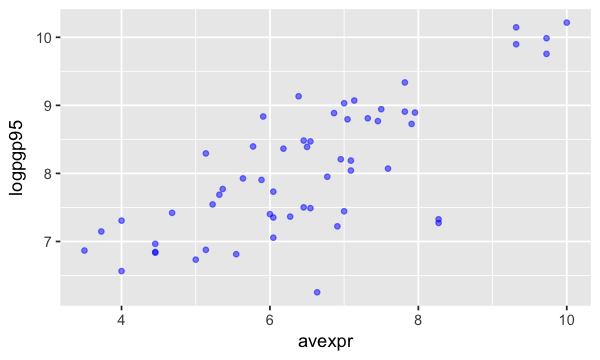

In [3]:
ggplot(df1, aes(x=avexpr, y=logpgp95), theme_minimal()) +
    geom_point(size=2, shape=20, colour = 'blue', alpha = 0.5) 

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita.

Specifically, if higher protection against expropriation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita).

Given the plot, choosing a linear model to describe this relationship seems like a reasonable assumption.

We can write our model as

$logpgp95_{i}$ = $\beta_{0}$ + $\beta_{1}$ + $avexpr_{i}$ + $u_{i}$

where:

* $\beta_{0}$ is the intercept of the linear trend line on the y-axis
* $\beta_{1}$ is the slope of the linear trend line, representing the marginal effect of protection against risk on log GDP per capita
* $u_{i}$ is a random error term (deviations of observations from the linear trend due to factors not included in the model)

Visually, this linear model involves choosing a straight line that best fits the data, as in the following plot (Figure 2 in [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001)

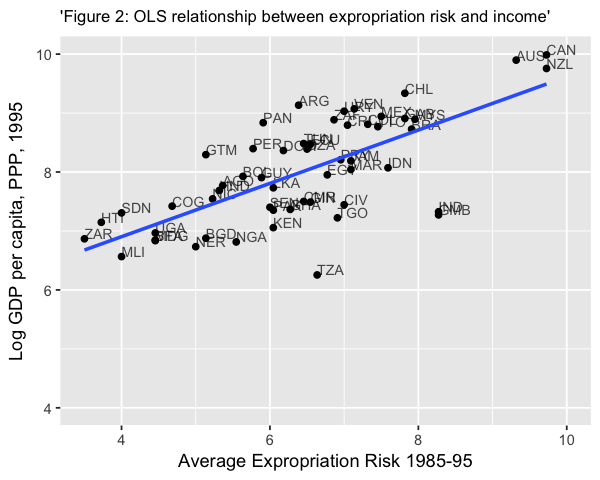

In [6]:
options(warn=-1)
options(repr.plot.width=5, repr.plot.height=4) # setting the size of plots

df1_subset <- subset(df1,baseco == 1)


ggplot(df1_subset, aes(x = avexpr, y = logpgp95))+
    geom_point() + # plots the points +
    geom_text(aes(label = shortnam), hjust = 0, vjust = 0, size=3, alpha = 0.7) +
    geom_smooth(method = 'lm',formula = y~x, se = FALSE) +
    ylim(4,10) +
    xlab("Average Expropriation Risk 1985-95") +
    ylab("Log GDP per capita, PPP, 1995") +
    ggtitle("'Figure 2: OLS relationship between expropriation risk and income'") +
    theme(plot.title = element_text(size = 10))
  

The most common technique to estimate the parameters ($\beta$‘s) of the linear model is Ordinary Least Squares (OLS).


As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals, ie.

$\underset{\hat{\beta}}{\min} \sum^N_{i=1} {\hat{u_i} ^2 }$

where $\hat{u_{i}}$ is the difference between the observation and the predicted value of the dependent variable.


In [11]:
reg1 <- lm(formula = logpgp95 ~ avexpr, data = df1)
stargazer(reg1,type = "text")


                        Dependent variable:    
                    ---------------------------
                             logpgp95          
-----------------------------------------------
avexpr                       0.487***          
                              (0.057)          
                                               
Constant                     4.893***          
                              (0.383)          
                                               
-----------------------------------------------
Observations                    57             
R2                             0.568           
Adjusted R2                    0.560           
Residual Std. Error       0.649 (df = 55)      
F Statistic           72.319*** (df = 1; 55)   
Note:               *p<0.1; **p<0.05; ***p<0.01


Note that an observation was mistakenly dropped from the results in the original paper (see the note located in maketable2.do from Acemoglu’s webpage), and thus the coefficients differ slightly.

From our results, we see that

* The intercept $\hat{\beta_{0}}$ = 4.63.

* The slope $\hat{\beta_{1}}$ = 0.53.

* The positive $\hat{\beta_{1}}$ parameter estimate implies that institutional quality has a positive effect on economic outcomes, as we saw in the figure.

* The p-value of 0.000 for $\hat{\beta_1}$ implies that the effect of institutions on GDP is statistically significant (using p < 0.05 as a rejection rule).

* The R-squared value of 0.611 indicates that around 61% of variation in log GDP per capita is explained by protection against expropriation.

Using our parameter estimates, we can now write our estimated relationship as

$\hat{logpgp95}_{i}$ = 4.63 + 0.53 $\hat{{avexpr}_{i}}



This equation describes the line that best fits our data, as shown in Figure 2.

We can use this equation to predict the level of log GDP per capita for a value of the index of expropriation protection.

For example, for a country with an index value of 7.07 (the average for the dataset), we find that their predicted level of log GDP per capita in 1995 is 8.38.

In [12]:
mean_expr <- mean(df1_subset$avexpr)
mean_expr

[1] 6.511962

In [13]:
predicted_logpdp95 <- 4.63 + 0.53 * 7.07
predicted_logpdp95

[1] 8.3771

In [14]:
newdata = as.data.frame(mean_expr)
colnames(newdata) <- c('avexpr')
predict(reg1, newdata)

1 
8.063693

We can obtain an array of predicted $logpgp95_{i}$ for every value of $avexpr_{i}$ in our dataset by using the 'predict' function with our model and 'new data' as parameters.

Plotting the predicted values against $avexpr_{i}$ shows that the predicted values lie along the linear line that we fitted above.

The observed values of $logpgp95_{i}$ are also plotted for comparison purposes.

In [15]:
# Drop missing observations from whole sample

df1_plot <- df1 %>%
  na.omit %>%
  select(logpgp95, avexpr)

# getpredicted values for subset
reg2 <- lm(formula = logpgp95 ~ avexpr, data = df1_plot)
df1_plot$predicted <- reg2$fitted 


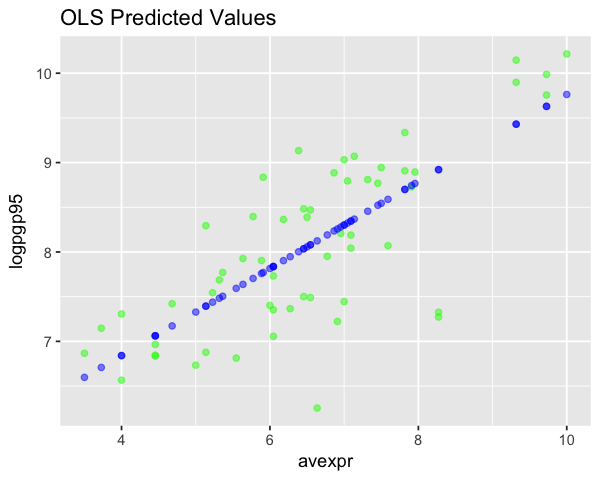

In [16]:
ggplot(df1_plot, aes(x = avexpr)) + 
  geom_point(aes(y = logpgp95), colour ="green", alpha = 0.5) + 
  geom_point(aes(y = predicted), colour = "blue", alpha = 0.5) + 
  ggtitle("OLS Predicted Values")


# Extending the Linear Regression Model

So far we have only accounted for institutions affecting economic performance - almost certainly there are numerous other factors affecting GDP that are not included in our model.

Leaving out variables that affect $logpgp95_{i}$ will result in omitted variable bias, yielding biased and inconsistent parameter estimates.

We can extend our bivariate regression model to a multivariate regression model by adding in other factors that may affect $logpgp95_{i}$. 

[AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) consider other factors such as:

* the effect of climate on economic outcomes; latitude is used to proxy this
* differences that affect both economic performance and institutions, eg. cultural, historical, etc.; controlled for with the use of continent dummies.

Let’s estimate some of the extended models considered in the paper (Table 2) using data from maketable2.dta.

In [17]:
df2 <- read_dta('maketable2.dta')

reg1 <- lm(formula = logpgp95 ~ avexpr, data = df2)
reg2 <- lm(formula = logpgp95 ~ avexpr + lat_abst, data = df2)
reg3 <- lm(formula = logpgp95 ~ avexpr + lat_abst + asia + africa + other, data = df2)

# Now that we have fitted our model, we will use the stargazer package 
# to display the results in a single table. 
# (model numbers correspond to those in the paper)

library(stargazer)
stargazer(reg1, reg2, reg3, type = "text", title = c("Model 1", "Model 3", "Model 4"))



Model 1
                                              Dependent variable:                           
                    ------------------------------------------------------------------------
                                                    logpgp95                                
                              (1)                      (2)                     (3)          
--------------------------------------------------------------------------------------------
avexpr                      0.532***                0.463***                0.390***        
                            (0.041)                  (0.055)                 (0.051)        
                                                                                            
lat_abst                                             0.872*                   0.333         
                                                     (0.488)                 (0.445)        
                                                             

# Endogeneity

As [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) discuss, the OLS models likely suffer from endogeneity issues, resulting in biased and inconsistent model estimates.

Namely, there is likely a two-way relationship between institutions and economic outcomes:

* richer countries may be able to afford or prefer better institutions
* variables that affect income may also be correlated with institutional differences
* the construction of the index may be biased; analysts may be biased towards seeing countries with higher income having better institutions

To deal with endogeneity, we can use two-stage least squares (2SLS) regression, which is an extension of OLS regression.

This method requires replacing the endogenous variable avexpri with a variable that is:

* correlated with $avexpr_{i}$ 
* not correlated with the error term (ie. it should not directly affect the dependent variable, otherwise it would be correlated with ui due to omitted variable bias)

The new set of regressors is called an instrument, which aims to remove endogeneity in our proxy of institutional differences.

The main contribution of [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) is the use of settler mortality rates to instrument for institutional differences.

They hypothesize that higher mortality rates of colonizers led to the establishment of institutions that were more extractive in nature (less protection against expropriation), and these institutions still persist today.

Using a scatterplot (Figure 3 in [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001)), we can see protection against expropriation is negatively correlated with settler mortality rates, coinciding with the authors’ hypothesis and satisfying the first condition of a valid instrument.


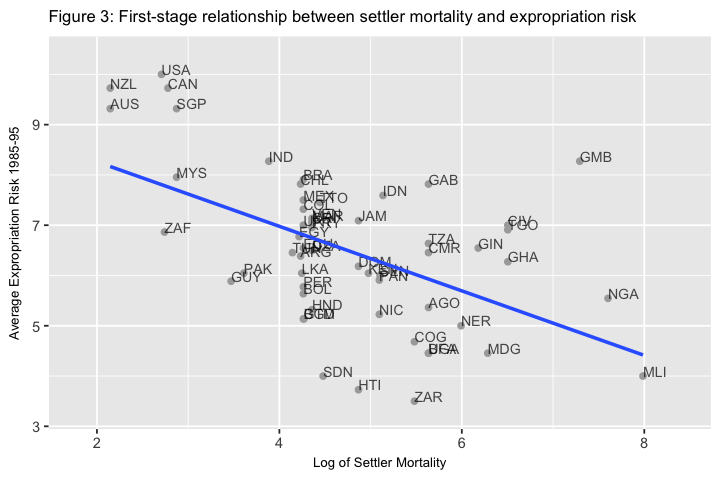

In [31]:
df1_subset2 <- df1 %>%
  na.omit %>%
  select(logem4, avexpr, shortnam)

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df1_subset2, aes(y = avexpr, x = logem4))+
    geom_point(colour = 'dark grey') + # plots the points
    geom_text(aes(label = shortnam), hjust = 0, vjust = 0, size=3, alpha = 0.7) +
    geom_smooth(method = 'lm',formula = y~x, se = FALSE) +
    ylim(3.3,10.4) +
    xlim(1.8,8.4) +
    ggtitle("Figure 3: First-stage relationship between settler mortality and expropriation risk")+
    xlab("Log of Settler Mortality") +
    ylab("Average Expropriation Risk 1985-95") +
    theme(axis.title=element_text(size=8),
        plot.title = element_text(size=10))

The second condition may not be satisfied if settler mortality rates in the 17th to 19th centuries have a direct effect on current GDP (in addition to their indirect effect through institutions).

For example, settler mortality rates may be related to the current disease environment in a country, which could affect current economic performance.

[AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) argue this is unlikely because:

* The majority of settler deaths were due to malaria and yellow fever, and had limited effect on local people
* The disease burden on local people in Africa or India, for example, did not appear to be higher than average, supported by relatively high population densities in these areas before colonization

As we appear to have a valid instrument, we can use 2SLS regression to obtain consistent and unbiased parameter estimates.

## First stage

The first stage involves regressing the endogenous variable $avexpr_{i}$ on the instrument.

The instrument is the set of all exogenous variables in our model (and not just the variable we have replaced).

Using model 1 as an example, our instrument is simply a constant and settler mortality rates $logem4_{i}$.

Therefore, we will estimate the first-stage regression as

$avexpr_{i}$ = $\delta_{0}$ + $\delta_{1}$$logem4_{i}$+ $v_{i}$
                        
The data we need to estimate this equation is located in maketable4.dta (only complete data, indicated by baseco = 1, is used for estimation)

In [33]:
df4 <- read_dta('maketable4.dta')
df4 <- subset(df4,baseco == 1)

In [34]:
results_fs <- lm(formula = avexpr ~logem4, data = df4)
stargazer(results_fs, type = "text")


                        Dependent variable:    
                    ---------------------------
                              avexpr           
-----------------------------------------------
logem4                       -0.607***         
                              (0.127)          
                                               
Constant                     9.341***          
                              (0.611)          
                                               
-----------------------------------------------
Observations                    64             
R2                             0.270           
Adjusted R2                    0.258           
Residual Std. Error       1.265 (df = 62)      
F Statistic           22.947*** (df = 1; 62)   
Note:               *p<0.1; **p<0.05; ***p<0.01


## Second stage

We need to retrieve the predicted values of $avexpr_{i}$ using the predict function.  

We then replace the endogenous variable $avexpr_{i}$ with the predicted values $\hat{avexpr_{i}}$ in the original linear model.

Our second stage regression is thus

$logpgp95_{i}$ = $\beta_{0}$ + $\beta_{1}$$avexpr_{i}$ + $u_{i}$


In [35]:
df4$predicted_avexpr <- results_fs$fitted.values

results_ss = lm(formula = logpgp95 ~ predicted_avexpr, data = df4)
stargazer(results_ss, type = "text")


                        Dependent variable:    
                    ---------------------------
                             logpgp95          
-----------------------------------------------
predicted_avexpr             0.944***          
                              (0.126)          
                                               
Constant                      1.910**          
                              (0.823)          
                                               
-----------------------------------------------
Observations                    64             
R2                             0.477           
Adjusted R2                    0.469           
Residual Std. Error       0.760 (df = 62)      
F Statistic           56.603*** (df = 1; 62)   
Note:               *p<0.1; **p<0.05; ***p<0.01


The second-stage regression results give us an unbiased and consistent estimate of the effect of institutions on economic outcomes.

The result suggests a stronger positive relationship than what the OLS results indicated.

Note that while our parameter estimates are correct, our standard errors are not and for this reason, computing 2SLS ‘manually’ (in stages with OLS) is not recommended.

We can correctly estimate a 2SLS regression in one step using the *ivreg* function found in the *AER* package.

To install this package, you will need to run ***install.packages('AER')*** in your console.

In [95]:
library(AER)

In [98]:
iv <- ivreg(formula = logpgp95 ~ avexpr|logem4, data = df4)
stargazer(iv, type = "text")


                        Dependent variable:    
                    ---------------------------
                             logpgp95          
-----------------------------------------------
avexpr                       0.944***          
                              (0.157)          
                                               
Constant                      1.910*           
                              (1.027)          
                                               
-----------------------------------------------
Observations                    64             
R2                             0.187           
Adjusted R2                    0.174           
Residual Std. Error       0.948 (df = 62)      
Note:               *p<0.1; **p<0.05; ***p<0.01


Given that we now have consistent and unbiased estimates, we can infer from the model we have estimated that institutional differences (stemming from institutions set up during colonization) can help to explain differences in income levels across countries today.

[AJR01] use a marginal effect of 0.94 to calculate that the difference in the index between Chile and Nigeria (ie. institutional quality) implies up to a 7-fold difference in income, emphasizing the significance of institutions in economic development.



# Exercises

## Exercise 1

In the lecture, we think the original model suffers from endogeneity bias due to the likely effect income has on institutional development.

Although endogeneity is often best identified by thinking about the data and model, we can formally test for endogeneity using the *Hausman* test.

We want to test for correlation between the endogenous variable, $avexpr_{i}$, and the errors, $u_{i}$.

$H_{0}$ : Cov($avexpr_{i}$ , $u_{i}$) = 0 (*no endogeneity*)

$H_{1}$ : Cov($avexpr_{i}$ , $u_{i}$) ≠ 0 (*endogeneity*)

First, we regress $avexpr_{i}$ on the instrument, $logem4_{i}$

$avexpr_{i}$ = $\pi_{0}$ + $\pi_{1}$$logem4_{i}$ + $υ_{i}$

Second, we retrieve the residuals $υˆ_{i}$ and include them in the original equation.

$logpgp95_{i}$ = $\beta_{0}$ + $\beta_{1}$ + $avexpr_{i}$ + $\alpha$$υˆ_{i}$ i + $υ_{i}$ 

If $\alpha$ is statistically significant (with a p-value < 0.05), then we reject the null hypothesis and conclude that avexpriavexpri is endogenous.

Using the above information, estimate a Hausman test and interpret your results.

## Exercise 2

The OLS parameter $\beta$ can also be estimated using matrix algebra and numpy (you may need to review the numpy lecture to complete this exercise).

The linear equation we want to estimate is (written in matrix form)

$y = X\beta + u$

To solve for the unknown parameter ββ, we want to minimise the sum of squared residuals

$\underset{\hat{\beta}} {\min} \hat{u} '\hat{u}$

Rearranging the first equation and substituting into the second equation, we can write

$\underset{\hat{\beta}}{\min} \ (Y - {X\hat{\beta})}' (Y - X\hat{\beta})$

Solving this optimization problem gives the solution for the β̂ coefficients

$\hat{\beta} = (X'X)^{-1}X'y$

Using the above information, compute β̂  from model 1 using numpy - your results should be the same as those in the statsmodels output from earlier in the lecture.



# Solutions

## Exercise 1

In [104]:
# Load in data

df4 <- read_dta("maketable4.dta") 
df4 <- na.omit(df4)

# Estimate the first stage regression
reg1 <- lm(formula = avexpr ~ logem4, data = df4)

# Retrieve the residuals
df4$resid <- reg1$residuals

# Estimate the second stage residuals
reg2 <- lm(logpgp95 ~ avexpr + resid, data = df4)

stargazer(reg2, type = "text")


                        Dependent variable:    
                    ---------------------------
                             logpgp95          
-----------------------------------------------
avexpr                       0.968***          
                              (0.086)          
                                               
resid                        -0.647***         
                              (0.102)          
                                               
Constant                     1.780***          
                              (0.565)          
                                               
-----------------------------------------------
Observations                    61             
R2                             0.735           
Adjusted R2                    0.726           
Residual Std. Error       0.534 (df = 58)      
F Statistic           80.631*** (df = 2; 58)   
Note:               *p<0.1; **p<0.05; ***p<0.01



The output shows that the coefficient on the residuals is statistically significant, indicating $avexpr_{i}$ is endogenous

## Exercise 2

In [15]:
# Load in data
df1 <- read_dta('maketable1.dta')
df1 <- df1 %>%
  select(logpgp95, avexpr) %>%
  na.omit 


# add constant term
df1$const <- rep(1,nrow(df1))

# Define the X and y variables
y <- as.array(df1$logpgp95)
X <- as.matrix(df1[,c('const', 'avexpr')])


# Compute beta hat
beta_hat <- solve(t(X) %*% X) %*% (t(X) %*% y)

In [17]:
beta_hat


const,4.6260894
avexpr,0.5318713
